# NYC Taxi Trip Duration Prediction

This notebook demonstrates a clean ML pipeline for predicting taxi trip durations using NYC Yellow Taxi data from October-November 2023.

## Pipeline Steps
1. Data preprocessing (using separate script)
2. Model training
3. Model evaluation
4. Results visualization

## 1. Setup and Imports

In [4]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

import sys
sys.path.append('..')

# Import our custom preprocessing functions

from taxi_ride.data.preprocess_data import (
    get_project_paths, 
    load_pickle, 
    dump_pickle,
    run_preprocessing
)

# Let's manually verify and set the correct paths
# Since we're in notebooks/, we need to go up one level to project root
NOTEBOOK_DIR = os.getcwd()
PROJECT_ROOT = os.path.dirname(NOTEBOOK_DIR)  # Go up one level

print(f"\nCurrent notebook directory: {NOTEBOOK_DIR}")
print(f"Project root: {PROJECT_ROOT}")

# Construct correct paths manually
CORRECT_RAW_DATA_DIR = os.path.join(PROJECT_ROOT, 'data', 'raw')
CORRECT_PROCESSED_DATA_DIR = os.path.join(PROJECT_ROOT, 'data', 'processed')

print(f"\nCorrected paths:")
print(f"Raw data directory: {CORRECT_RAW_DATA_DIR}")
print(f"Processed data directory: {CORRECT_PROCESSED_DATA_DIR}")

# Create directories if they don't exist
os.makedirs(CORRECT_RAW_DATA_DIR, exist_ok=True)
os.makedirs(CORRECT_PROCESSED_DATA_DIR, exist_ok=True)

print(f"\nDirectory structure:")
print(f"Raw data exists: {os.path.exists(CORRECT_RAW_DATA_DIR)}")
print(f"Processed data exists: {os.path.exists(CORRECT_PROCESSED_DATA_DIR)}")


Current notebook directory: /home/lisanab/fujitsu_laptop_files/MLOps/cookiecutter/cookiecutter-ml-course/notebooks
Project root: /home/lisanab/fujitsu_laptop_files/MLOps/cookiecutter/cookiecutter-ml-course

Corrected paths:
Raw data directory: /home/lisanab/fujitsu_laptop_files/MLOps/cookiecutter/cookiecutter-ml-course/data/raw
Processed data directory: /home/lisanab/fujitsu_laptop_files/MLOps/cookiecutter/cookiecutter-ml-course/data/processed

Directory structure:
Raw data exists: True
Processed data exists: True


## 2. Data Preprocessing

We'll use the `preprocess_data.py` script to load and prepare our data from URLs.

In [5]:
run_preprocessing(
    raw_data_path=CORRECT_RAW_DATA_DIR,
    dest_path=CORRECT_PROCESSED_DATA_DIR,
    dataset="green",         # or "yellow"
    train_month="2023-10",
    val_month="2023-11",
    test_month="2023-12"
)




Loading training data...
Loading data from local file: /home/lisanab/fujitsu_laptop_files/MLOps/cookiecutter/cookiecutter-ml-course/data/raw/green_tripdata_2023-10.parquet
Training data shape: (63119, 21)

Loading validation data...
Loading data from local file: /home/lisanab/fujitsu_laptop_files/MLOps/cookiecutter/cookiecutter-ml-course/data/raw/green_tripdata_2023-11.parquet
Validation data shape: (61105, 21)

Loading test data...
Loading data from local file: /home/lisanab/fujitsu_laptop_files/MLOps/cookiecutter/cookiecutter-ml-course/data/raw/green_tripdata_2023-12.parquet
Test data shape: (61119, 21)

Preprocessing features...
Training features shape: (63119, 6025)
Validation features shape: (61105, 6025)
Test features shape: (61119, 6025)

Saving processed data to /home/lisanab/fujitsu_laptop_files/MLOps/cookiecutter/cookiecutter-ml-course/data/processed...
Done!


In [ ]:
# # 2. Download and Save Raw Data
# from taxi_ride.data.preprocess_data import (
#     get_data_path, 
#     load_parquet, 
#     save_parquet
# )

# # Configuration
# BASE_URL = "https://d37ci6vzurychx.cloudfront.net/trip-data"
# OUTPUT_DIR = CORRECT_RAW_DATA_DIR
# DATASET = "green"  # Change to "yellow" if needed
# MONTHS = ["2023-10", "2023-11", "2023-12"]

# #print(f"Output directory: {OUTPUT_DIR}")
# print(f"Dataset: {DATASET}")
# print(f"Months: {MONTHS}")

# # Ensure output directory exists
# os.makedirs(OUTPUT_DIR, exist_ok=True)

# # Download each month's data using existing functions
# downloaded_files = []

# for month in MONTHS:
#     # Use get_data_path to construct the URL
#     url = get_data_path(BASE_URL, DATASET, month)
    
#     # Construct local output path
#     filename = f"{DATASET}_tripdata_{month}.parquet"
#     output_path = os.path.join(OUTPUT_DIR, filename)
    
#     print(f"\nProcessing {filename}...")
#     print(f"  URL: {url}")
#     #print(f"  Local path: {output_path}")
    
#     try:
#         # Use load_parquet to download data
#         df = load_parquet(url)
#         print(f"  ✓ Loaded data: {df.shape[0]:,} rows, {df.shape[1]} columns")
        
#         # Use save_parquet to save locally
#         save_parquet(df, output_path)
        
#         # Show basic info
#         print(f"  Columns: {len(df.columns)}")
        
#         downloaded_files.append(output_path)
        
#     except Exception as e:
#         print(f"  ✗ Error processing {filename}: {e}")

# print(f"\n✓ Download completed!")
# print(f"Files downloaded: {len(downloaded_files)}")

Dataset: green
Months: ['2023-10', '2023-11', '2023-12']

Processing green_tripdata_2023-10.parquet...
  URL: https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-10.parquet
Loading data from URL: https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-10.parquet
  ✓ Loaded data: 66,177 rows, 20 columns
  Columns: 20

Processing green_tripdata_2023-11.parquet...
  URL: https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-11.parquet
Loading data from URL: https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-11.parquet
  ✓ Loaded data: 64,025 rows, 20 columns
  Columns: 20

Processing green_tripdata_2023-12.parquet...
  URL: https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-12.parquet
Loading data from URL: https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-12.parquet
  ✓ Loaded data: 64,215 rows, 20 columns
  Columns: 20

✓ Download completed!
Files downloaded: 3


## 3. Load Preprocessed Data

In [3]:
from taxi_ride.data.preprocess_data import load_pickle

PROCESSED_DATA_DIR = os.path.join("..", "data", "processed")

X_train, y_train = load_pickle(os.path.join(PROCESSED_DATA_DIR, "train.pkl"))
X_val, y_val = load_pickle(os.path.join(PROCESSED_DATA_DIR, "val.pkl"))
dv = load_pickle(os.path.join(PROCESSED_DATA_DIR, "dv.pkl"))

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Number of features: {len(dv.feature_names_)}")



Training set: (63119, 6025)
Validation set: (61105, 6025)
Number of features: 6025


## 4. Exploratory Data Analysis

In [4]:
# Statistics on target variable
print("Training Data Duration Statistics:")
print(f"Mean: {y_train.mean():.2f} minutes")
print(f"Median: {np.median(y_train):.2f} minutes")
print(f"Std Dev: {y_train.std():.2f} minutes")
print(f"Min: {y_train.min():.2f} minutes")
print(f"Max: {y_train.max():.2f} minutes")

Training Data Duration Statistics:
Mean: 15.20 minutes
Median: 12.50 minutes
Std Dev: 10.20 minutes
Min: 1.00 minutes
Max: 60.00 minutes


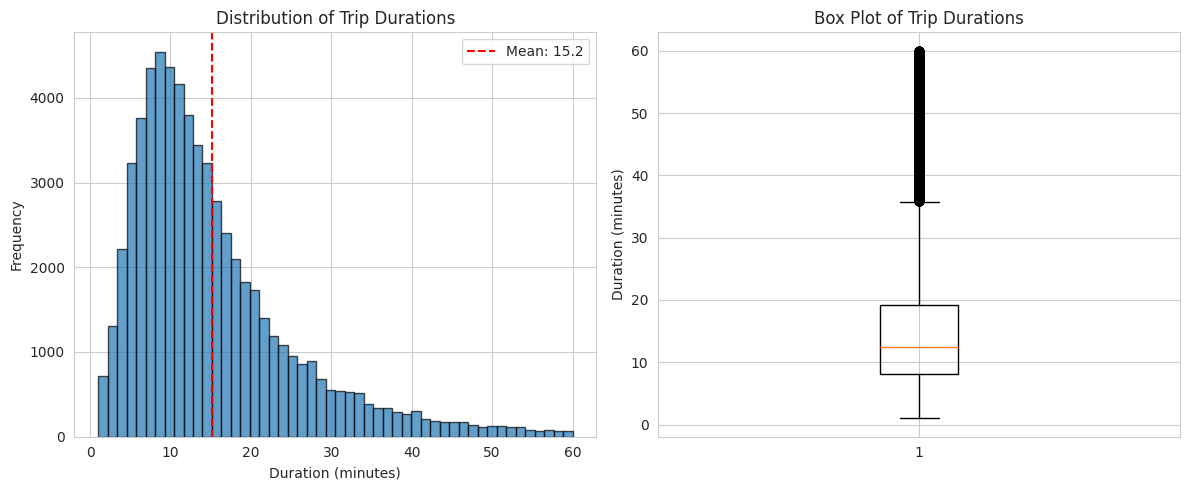

In [5]:
# Distribution of trip durations
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(y_train, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.axvline(y_train.mean(), color='red', linestyle='--', label=f'Mean: {y_train.mean():.1f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(y_train, vert=True)
plt.ylabel('Duration (minutes)')
plt.title('Box Plot of Trip Durations')

plt.tight_layout()
plt.show()

## 5. Model Training

In [6]:
# Train linear regression model
print("Training Linear Regression model...")
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training complete!")

Training Linear Regression model...
Training complete!


## 6. Model Evaluation

In [8]:
def evaluate_model(model, X, y, dataset_name=""):
    """Evaluate model and print metrics."""
    y_pred = model.predict(X)
    
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    print(f"\n{dataset_name} Metrics:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    
    return y_pred, rmse, mae, r2

# Evaluate on training set
y_train_pred, _, _, _ = evaluate_model(lr, X_train, y_train, "Training Set")

# Evaluate on validation set
y_val_pred, val_rmse, val_mae, val_r2 = evaluate_model(lr, X_val, y_val, "Validation Set")


Training Set Metrics:
  RMSE: 5.3291
  MAE:  3.6977
  R²:   0.7269

Validation Set Metrics:
  RMSE: 6.5822
  MAE:  4.3822
  R²:   0.5562


## 7. Results Visualization

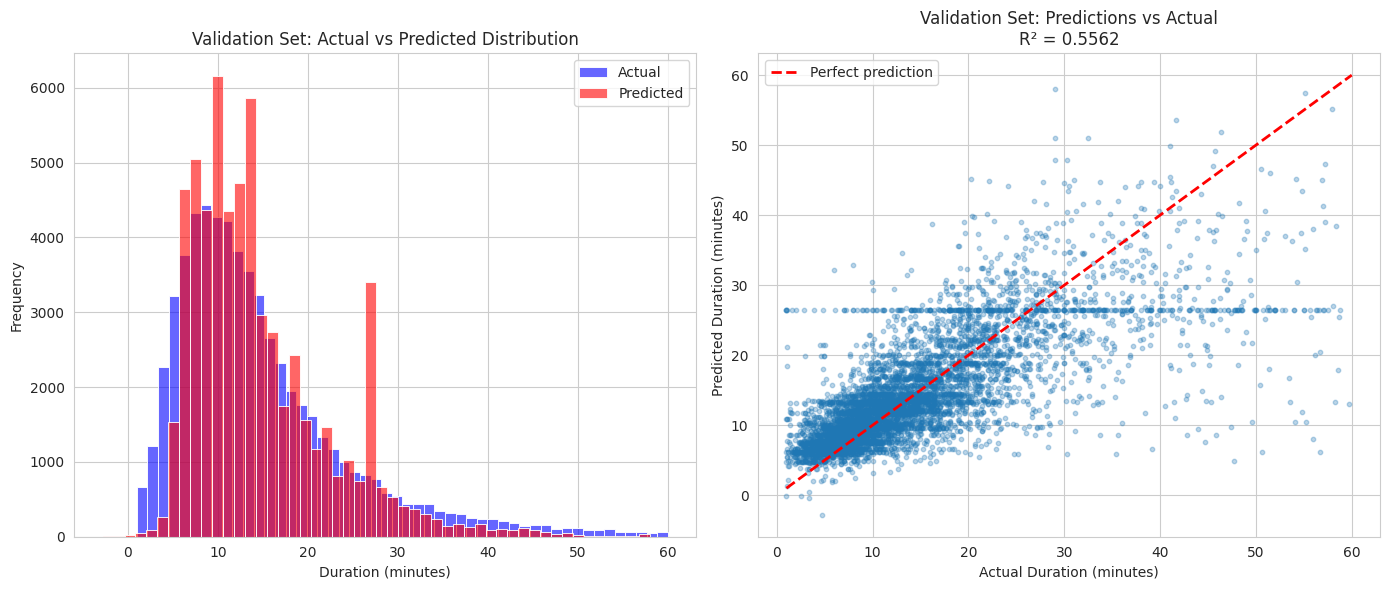

In [9]:
# Compare predictions vs actual
plt.figure(figsize=(14, 6))

# Distribution comparison
plt.subplot(1, 2, 1)
sns.histplot(y_val, label='Actual', alpha=0.6, bins=50, color='blue')
sns.histplot(y_val_pred, label='Predicted', alpha=0.6, bins=50, color='red')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Validation Set: Actual vs Predicted Distribution')
plt.legend()

# Scatter plot
plt.subplot(1, 2, 2)
# Sample for visualization (plot every 10th point)
sample_idx = np.arange(0, len(y_val), 10)
plt.scatter(y_val[sample_idx], y_val_pred[sample_idx], alpha=0.3, s=10)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label='Perfect prediction')
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.title(f'Validation Set: Predictions vs Actual\nR² = {val_r2:.4f}')
plt.legend()

plt.tight_layout()
plt.show()

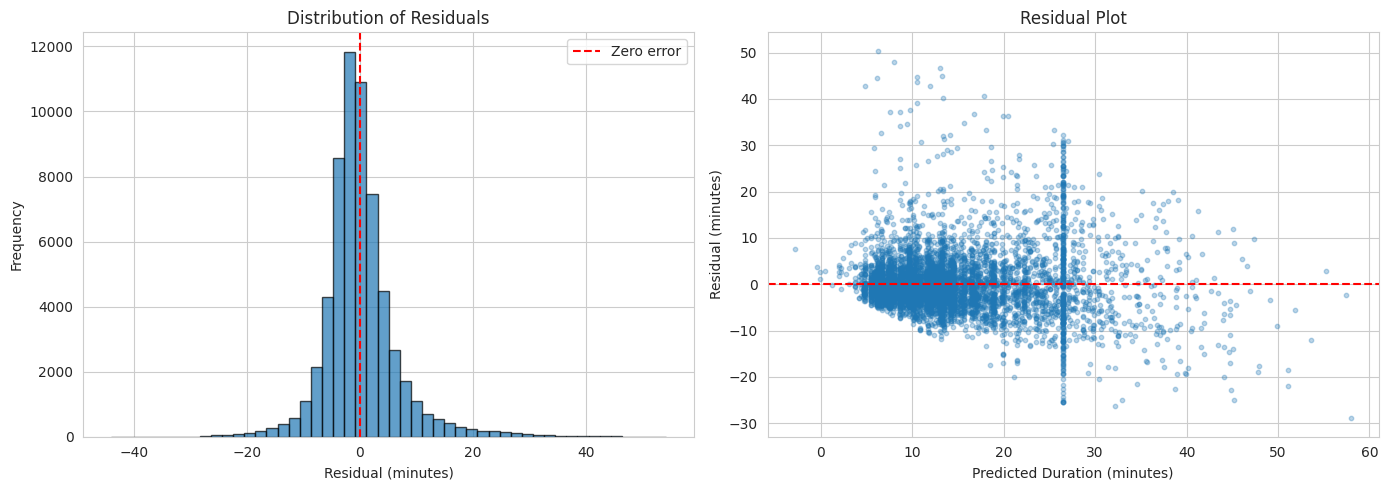

In [10]:
# Residual analysis
residuals = y_val - y_val_pred

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Residual (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.axvline(0, color='red', linestyle='--', label='Zero error')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_val_pred[sample_idx], residuals[sample_idx], alpha=0.3, s=10)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Duration (minutes)')
plt.ylabel('Residual (minutes)')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

## 8. Model Summary

In [11]:
print("="*50)
print("MODEL SUMMARY")
print("="*50)
print(f"\nModel Type: Linear Regression")
print(f"Number of Features: {X_train.shape[1]}")
print(f"Training Samples: {X_train.shape[0]:,}")
print(f"Validation Samples: {X_val.shape[0]:,}")
print(f"\nValidation Performance:")
print(f"  RMSE: {val_rmse:.4f} minutes")
print(f"  MAE:  {val_mae:.4f} minutes")
print(f"  R²:   {val_r2:.4f}")
print(f"\nMean Absolute Percentage Error: {(val_mae / y_val.mean() * 100):.2f}%")
print("="*50)

MODEL SUMMARY

Model Type: Linear Regression
Number of Features: 6025
Training Samples: 63,119
Validation Samples: 61,105

Validation Performance:
  RMSE: 6.5822 minutes
  MAE:  4.3822 minutes
  R²:   0.5562

Mean Absolute Percentage Error: 29.56%


## 9. Save Model

In [13]:
# Save the trained model
model_path = os.path.join(PROJECT_ROOT,"models", "linear_regression_model.pkl")
with open(model_path, "wb") as f_out:
    pickle.dump(lr, f_out)

print(f"Model saved to: {model_path}")

Model saved to: /home/lisanab/fujitsu_laptop_files/MLOps/cookiecutter/cookiecutter-ml-course/models/linear_regression_model.pkl
